# TC 5033
## Deep Learning
## Fully Connected Deep Neural Networks

## Team #
#### * Elmer Payro Costilla -           A01014943
#### * Christopher Valdez Cantú -      A01793549
#### * José Francisco Muñoz del Ángel - A01794174
#### * Luis José Navarrete Baduy -     A01793919

## Activity 1b: Implementing a Fully Connected Network for Kaggle ASL Dataset

- Objective

The aim of this part of the activity is to apply your understanding of Fully Connected Networks by implementing a multilayer network for the [Kaggle ASL (American Sign Language) dataset](https://www.kaggle.com/datasets/grassknoted/asl-alphabet). While you have been provided with a complete solution for a Fully Connected Network using Numpy for the MNIST dataset, you are encouraged to try to come up with the solution.

- Instructions

    This activity requires submission in teams of 3 or 4 members. Submissions from smaller or larger teams will not be accepted unless prior approval has been granted (only due to exceptional circumstances). While teamwork is encouraged, each member is expected to contribute individually to the assignment. The final submission should feature the best arguments and solutions from each team member. Only one person per team needs to submit the completed work, but it is imperative that the names of all team members are listed in a Markdown cell at the very beginning of the notebook (either the first or second cell). Failure to include all team member names will result in the grade being awarded solely to the individual who submitted the assignment, with zero points given to other team members (no exceptions will be made to this rule).

    Load and Preprocess Data: You are provided a starter code to load the data. Be sure to understand the code.

    Review MNIST Notebook (Optional): Before diving into this activity, you have the option to revisit the MNIST example to refresh your understanding of how to build a Fully Connected Network using Numpy.

    Start Fresh: Although you can refer to the MNIST solution at any point, try to implement the network for the ASL dataset on your own. This will reinforce your learning and understanding of the architecture and mathematics involved.

    Implement Forward and Backward Pass: Write the code to perform the forward and backward passes, keeping in mind the specific challenges and characteristics of the ASL dataset.
    
     Design the Network: Create the architecture of the Fully Connected Network tailored for the ASL dataset. Choose the number of hidden layers, neurons, and hyperparameters judiciously.

    Train the Model: Execute the training loop, ensuring to track performance metrics such as loss and accuracy.

    Analyze and Document: Use Markdown cells to document in detail the choices you made in terms of architecture and hyperparameters, you may use figures, equations, etc to aid in your explanations. Include any metrics that help justify these choices and discuss the model's performance.  

- Evaluation Criteria

    - Code Readability and Comments
    - Appropriateness of chosen architecture and hyperparameters for the ASL dataset
    - Performance of the model on the ASL dataset (at least 70% acc)
    - Quality of Markdown documentation

- Submission

Submit this Jupyter Notebook in canvas with your complete solution, ensuring your code is well-commented and includes Markdown cells that explain your design choices, results, and any challenges you encountered.


In [5]:
import numpy as np
import string
import pandas as pd
import matplotlib.pyplot as plt
#import cv2 as cv
import os

%load_ext autoreload
%autoreload 2
#################################
%matplotlib inline


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
# Define the path to the directory containing the CSV data files
DATA_PATH = 'asl_data'

# Load the training data from the 'sign_mnist_train.csv' CSV file
train_df = pd.read_csv(os.path.join(DATA_PATH, 'sign_mnist_train.csv'))

# Load the validation data from the 'sign_mnist_valid.csv' CSV file
valid_df = pd.read_csv(os.path.join(DATA_PATH, 'sign_mnist_valid.csv'))


In [7]:
# Display the first few rows of the training data DataFrame
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,12,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


### Importar Images

In [8]:
# Extract the labels for training data from the 'label' column
y_train = np.array(train_df['label'])

# Extract the labels for validation data from the 'label' column
yv = np.array(valid_df['label'])

# Extract the features for training data by removing the 'label' column and converting to NumPy array 
x_train = train_df.drop(columns=['label']).values.astype(np.float32)

# Extract the features for validation data by removing the 'label' column and converting to NumPy array
xv = valid_df.drop(columns=['label']).values.astype(np.float32)


In [9]:
# Remove the 'label' column from the training DataFrame
del train_df['label']
# Remove the 'label' column from the validation DataFrame
del valid_df['label']

In [10]:
print(xv.shape)
round(xv.shape[0]*.5)

(7172, 784)


3586

In [11]:
def split_val_test(x, y, pct=0.6, shuffle=False):
    '''
    Create a function that will allow you to split the previously loaded validation set
    into valition and test.
    '''
    cutoff = round(x.shape[0] * pct)    
    if shuffle:
        np.random.shuffle(x) # Shuffle the input features fixme
        np.random.shuffle(y) # Shuffle the target labels
    # Split the data into training and validation sets
    return x[:cutoff],y[:cutoff],x[cutoff:],y[cutoff:]

In [12]:
# Split the validation data (xv, yv) into validation and test sets using the split_val_test function
x_val, y_val, x_test, y_test = split_val_test(xv, yv)

In [13]:
print(x_val.shape)
print(x_test.shape)

(4303, 784)
(2869, 784)


### Normalise

In [14]:
x_train.mean(), x_train.std(), x_train.min()

(159.29083, 48.76953, 0.0)

In [15]:
def normalize(x_mean, x_std, x_data):
    '''
    Normalize a dataset using mean and standard deviation.
    
    Parameters:
    - x_mean: Mean of the dataset.
    - x_std: Standard deviation of the dataset.
    - x_data: Data to be normalized.
    
    Returns:
    - Normalized data.
    '''
    return (x_data - x_mean) / x_std

In [16]:
# Calculate the mean and standard deviation of the training data
x_mean = x_train.mean()
x_std = x_train.std()

# Normalize the training data using the calculated mean and standard deviation
x_train = normalize(x_mean, x_std, x_train)

# Normalize the validation data using the same mean and standard deviation as the training data
x_val = normalize(x_mean, x_std, x_val)

# Normalize the test data using the same mean and standard deviation as the training data
x_test = normalize(x_mean, x_std, x_test)

In [17]:
x_train.mean(), x_train.std()

(3.6268384e-06, 0.99999946)

### Graficar muestras

In [18]:
def plot_number(image):
    '''
    Plot a grayscale image.

    Parameters:
    - image: The image data to be plotted.

    Displays the input image as a grayscale plot with no axis.
    '''
    plt.figure(figsize=(4,4))
    plt.imshow(image.reshape(28,28), cmap='gray')
    plt.axis('off')
    plt.show()

La imagen muestreada representa un: 6


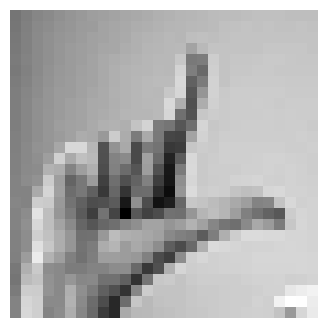

In [19]:
# Generate a random index within the length of the test labels (y_test)
rnd_idx = np.random.randint(len(y_test))

# Print the label of the randomly selected image from the test set
print(f'La imagen muestreada representa un: {y_test[rnd_idx]}')

# Plot the randomly selected image using the plot_number function
plot_number(xv[rnd_idx])

### Ecuaciones para nuestro modelo


$$z^1 = W^1 X + b^1$$

$$a^1 = ReLU(z^1) $$

$$z^2 = W^2 a^1 + b^2$$

$$\hat{y} = \frac{e^{z^{2_k}}}{\sum_j{e^{z_j}}}$$


$$ \mathcal{L}(\hat{y}^{i}, y^{i}) =  - y^{i}  \ln(\hat{y}^{i}) = -\ln(\hat{y}^i)$$


$$ \mathcal{J}(w, b) =  \frac{1}{num\_samples} \sum_{i=1}^{num\_samples}-\ln(\hat{y}^{i})$$

### Funciones adicionales

#### Mini batches

In [20]:
def create_minibatches(mb_size, x, y, shuffle = True):
    '''
    Create minibatches from the input data for mini-batch training.

    Parameters:
    - mb_size: Size of each minibatch.
    - x: Input features.
    - y: Target labels.
    - shuffle: Whether to shuffle the data before creating minibatches (default is True).

    Returns:
    - A generator that yields minibatches of data.
    '''
    assert x.shape[0] == y.shape[0], 'Error en cantidad de muestras'
    total_data = x.shape[0]  # Total number of data samples
    
    if shuffle:
        idxs = np.arange(total_data)  # Create an array of indices from 0 to total_data
        np.random.shuffle(idxs)      # Shuffle the indices
        x = x[idxs]                  # Shuffle the input features based on shuffled indices
        y = y[idxs]                  # Shuffle the target labels based on shuffled indices
    
    # Create and return a generator that yields minibatches
    return ((x[i:i+mb_size], y[i:i+mb_size]) for i in range(0, total_data, mb_size))

In [21]:
class np_tensor(np.ndarray): pass

## Nuestra clase Linear, ReLU y Sequential

###  Clase Linear

In [22]:
class Linear():
    def __init__(self, input_size, output_size):
        '''
        Initialize parameters using Kaiming He initialization.
        
        Parameters:
        - input_size: Number of input features.
        - output_size: Number of output features (neurons).
        '''
        # Initialize weights (self.W) using Kaiming He initialization
        self.W = (np.random.randn(output_size, input_size) / np.sqrt(input_size/2)).view(np_tensor)
        
        # Initialize biases (self.b) as zeros
        self.b = (np.zeros((output_size, 1))).view(np_tensor)
    
    def __call__(self, X):
        '''
        Forward pass of the linear layer.

        Parameters:
        - X: Input data.

        Returns:
        - Z: The linear transformation result.
        '''
        Z = self.W @ X + self.b  # Compute the linear transformation
        return Z
    
    def backward(self, X, Z):
        '''
        Backward pass of the linear layer.

        Parameters:
        - X: Input data.
        - Z: Linear transformation result.

        Performs backpropagation and updates gradients.
        '''
        # Compute the gradient of the input data
        X.grad = self.W.T @ Z.grad
        
        # Compute the gradient of the weights
        self.W.grad = Z.grad @ X.T
        
        # Compute the gradient of the biases
        self.b.grad = np.sum(Z.grad, axis = 1, keepdims=True)

### Clase ReLU

In [23]:
class ReLU():
    def __call__(self, Z):
        '''
        Forward pass of the Rectified Linear Unit (ReLU) activation function.
        '''
        A = np.maximum(0, Z)  # Compute the ReLU activation function
        return A
    
    def backward(self, Z, A):
        '''
        Backward pass of the Rectified Linear Unit (ReLU) activation function.
        Performs backpropagation and updates gradients.
        '''
        Z.grad = A.grad.copy()  # Copy the gradient from the output
        Z.grad[Z <= 0] = 0      # Zero out the gradient where input was <= 0 (derivative of ReLU)

### Clase Sequential

In [24]:
class Sequential_layers():
    def __init__(self, layers):
        '''
        Initialize a Sequential neural network model with a list of layers.

        Parameters:
        - layers: A list containing objects of types Linear and ReLU.
        '''
        self.layers = layers  # Store the list of layers
        self.x = None         # Initialize input data (x) to None
        self.outputs = {}     # Initialize a dictionary to store intermediate outputs

    def __call__(self, X):
        '''
        Forward pass of the Sequential neural network model.

        Parameters:
        - X: Input data.

        Returns:
        - The final output of the model.
        '''
        self.x = X 
        self.outputs['l0'] = self.x  # Store the input data as 'l0' output
        for i, layer in enumerate(self.layers, 1):
            self.x = layer(self.x)  # Apply each layer in sequence
            self.outputs['l'+str(i)]=self.x  # Store intermediate outputs
        return self.x

    def backward(self):
        '''
        Backward pass for the Sequential neural network model.

        Performs backpropagation through the layers and updates gradients.
        '''
        for i in reversed(range(len(self.layers))):
            self.layers[i].backward(self.outputs['l'+str(i)], self.outputs['l'+str(i+1)])

    def update(self, learning_rate = 1e-3):
        '''
        Update the model's parameters using gradient descent.

        Parameters:
        - learning_rate: Learning rate for gradient descent (default is 1e-3).
        '''
        for layer in self.layers:
            if isinstance(layer, ReLU): continue  # Skip ReLU layers
            layer.W = layer.W - learning_rate * layer.W.grad  # Update weights
            layer.b = layer.b - learning_rate * layer.b.grad  # Update biases

    def predict(self, X):
        '''
        Make predictions using the model.

        Parameters:
        - X: Input data.

        Returns:
        - The predicted class label.
        '''
        return np.argmax(self.__call__(X))  # Return the class with the highest output

### Cost Function

In [25]:
def softmaxXEntropy(x, y):
    '''
    Compute the softmax cross-entropy loss and gradients.

    Parameters:
    - x: Input scores or logits.
    - y: Target labels.

    Returns:
    - preds: Predicted probabilities.
    - cost: Softmax cross-entropy loss.
    '''
    batch_size = x.shape[1]  # Get the batch size
    
    # Compute the softmax probabilities for each class
    exp_scores = np.exp(x)
    probs = exp_scores / exp_scores.sum(axis = 0)
    preds = probs.copy()  # Store the predicted probabilities
    
    # Compute the softmax cross-entropy loss
    y_hat = probs[y.squeeze(), np.arange(batch_size)]
    cost = np.sum(-np.log(y_hat)) / batch_size
    
    # Calculate gradients for backpropagation
    probs[y.squeeze(), np.arange(batch_size)] -= 1  # dL/dx
    x.grad = probs.copy()  # Store gradients
    
    return preds, cost

### Loop de entrenamiento

In [26]:
def accuracy(x, y, mb_size, model):
    '''
    Compute the accuracy of a model on a given dataset.
    '''
    correct = 0  # Initialize the count of correctly predicted samples
    total = 0    # Initialize the total number of samples
    
    # Iterate through mini-batches of data
    for i, (x, y) in enumerate(create_minibatches(mb_size, x, y)):
        # Make predictions using the model
        pred = model(x.T.view(np_tensor))
        
        # Count the number of correctly predicted samples in the mini-batch
        correct += np.sum(np.argmax(pred, axis=0) == y.squeeze())
        
        # Update the total number of samples
        total += pred.shape[1]
    
    # Calculate and return the accuracy
    return correct/total

### Create your model and train it

In [27]:
x_train.shape

(27455, 784)

In [28]:
def train(model, epochs, mb_size=128, learning_rate=1e-3):
    '''
    Train a neural network model using mini-batch gradient descent.

    Parameters:
    - model: The neural network model to be trained.
    - epochs: Number of training epochs.
    - mb_size: Mini-batch size for training (default is 128).
    - learning_rate: Learning rate for gradient descent (default is 1e-3).
    '''
    for epoch in range(epochs):
        for i, (x, y) in enumerate(create_minibatches(mb_size, x_train, y_train)):
            # Forward pass to compute scores and cost
            scores = model(x.T.view(np_tensor))
            _, cost = softmaxXEntropy(scores, y)
            
            # Backward pass for gradient computation
            model.backward()
            
            # Update model parameters using gradient descent
            model.update(learning_rate)
        
        # Compute and print cost and accuracy for the current epoch
        print(f'costo: {cost}, accuracy: {accuracy(x_val, y_val, mb_size, model)}')

In [29]:
#Default
#model = Sequential_layers([Linear(784, 200), ReLU(), Linear(200, 200), ReLU(), Linear(200, 10)])
#mb_size = 512
#learning_rate = 1e-4
#epochs = 20

In [30]:
# Create a neural network model with a sequential architecture
model = Sequential_layers([
    Linear(784, 400), ReLU(),       # Layer 1: 784 input features, 400 output features with ReLU activation
    Linear(400, 400), ReLU(),       # Layer 2: 400 input features, 400 output features with ReLU activation
    Linear(400, 400), ReLU(),       # Layer 3: 400 input features, 400 output features with ReLU activation
    Linear(400, 400), ReLU(),       # Layer 4: 400 input features, 400 output features with ReLU activation
    Linear(400, 400), ReLU(),       # Layer 5: 400 input features, 400 output features with ReLU activation
    Linear(400, 24)                 # Layer 6: 400 input features, 24 output features
])

# Set mini-batch size, learning rate, and number of training epochs
mb_size = 512           # Mini-batch size
learning_rate = 1e-4    # Learning rate for gradient descent
epochs = 35             # Number of training epochs

In [31]:
train(model, epochs, mb_size, learning_rate)

costo: 0.634166192010805, accuracy: 0.6318847315826168
costo: 0.18139213342227714, accuracy: 0.71136416453637
costo: 0.06596980455177855, accuracy: 0.7483151289797816
costo: 0.02932712813813073, accuracy: 0.7571461770857542
costo: 0.022560870013927935, accuracy: 0.7592377411108528
costo: 0.01323260620348495, accuracy: 0.7636532651638391
costo: 0.013260785772818385, accuracy: 0.7652800371833605
costo: 0.009084816384830429, accuracy: 0.7645828491749942
costo: 0.00679910917369437, accuracy: 0.7659772251917267
costo: 0.004989895576313538, accuracy: 0.7683011852196142
costo: 0.0043344932261434954, accuracy: 0.7692307692307693
costo: 0.004034431241239863, accuracy: 0.7662096211945154
costo: 0.0034726962440427603, accuracy: 0.768533581222403
costo: 0.004227608894213869, accuracy: 0.7692307692307693
costo: 0.00322969089907983, accuracy: 0.770392749244713
costo: 0.0028312816268371973, accuracy: 0.7689983732279805
costo: 0.0028232328380122275, accuracy: 0.7717871252614456
costo: 0.00260839988105

### Test your model on Random data from your test set

In [32]:
### Alphabet array to determine results

alphabet=list(string.ascii_lowercase)
alphabet.remove('j') # Not included in the photos
alphabet.remove('z')
print(len(alphabet))

24


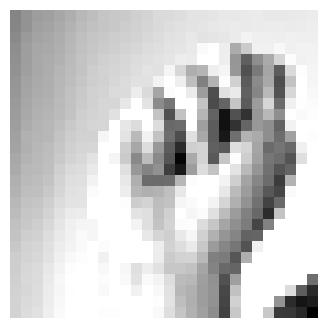

el valor predicho es: n el valor real es:n


In [33]:
idx = np.random.randint(len(y_test))
plot_number(x_test[idx].reshape(28,28))
pred = model.predict(x_test[idx].reshape(-1, 1))
print(f'el valor predicho es: {alphabet[pred]} el valor real es:{alphabet[y_test[idx]]}')